# Figures from book chapter

## Two from earlier investigation

In [2]:
import os
import pandas as pd
from corpkit import *
%matplotlib inline
r = load_all_results()

21:55:04: adj_modifiers.p loaded as adj_modifiers.
21:55:04: adj_riskwords.p loaded as adj_riskwords.
21:55:06: all_govs.p loaded as all_govs.
21:55:06: allwords.p loaded as allwords.
21:55:06: at_risk_things.p loaded as at_risk_things.
21:55:06: baseline.p loaded as baseline.
21:55:06: edited_adj_riskwords.p loaded as edited_adj_riskwords.
21:55:06: health-processes.p loaded as health-processes.
21:55:11: health-social-actors-w-risk-in-sent.p loaded as health-social-actors-w-risk-in-sent.
21:55:13: health_kwds.p loaded as health_kwds.
21:55:37: health_kwds_compared_to_nyt.p loaded as health_kwds_compared_to_nyt.
21:55:39: health_ngrams.p loaded as health_ngrams.
21:55:41: kwds.p loaded as kwds.
21:55:41: modals.p loaded as modals.
21:55:41: modals_lemmatised.p loaded as modals_lemmatised.
21:55:41: modifiers.p loaded as modifiers.
21:55:41: n_atrisk_n.p loaded as n_atrisk_n.
21:55:52: ngms.p loaded as ngms.
21:56:12: noun_lemmata.p loaded as noun_lemmata.
21:56:12: predicators.p loade

In [40]:
first_fig = pd.read_csv('1900-2000-comparison.csv', index_col = 0)
first_fig

,1900,2000
,,
economics,17.7,22.0
politics,21.1,20.8
health,1.0,13.4
medicine,0.0,3.2
sport,11.5,7.8
...,...,...
military,4.3,1.5
social order,3.3,0.2
technology,0.0,5.4



23:49:36: images/domains_june_final.png created.


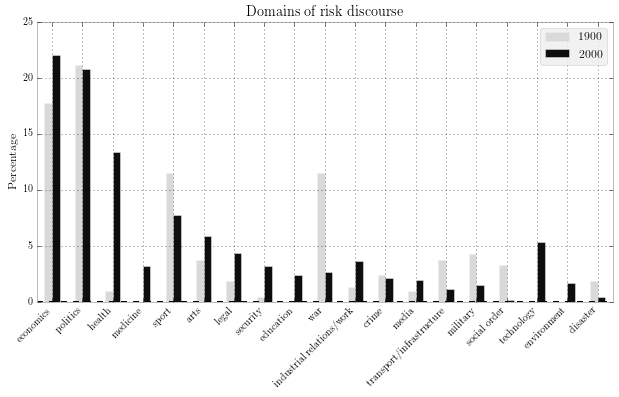

In [138]:
plotter('Domains of risk discourse', first_fig, kind = 'bar', num_to_plot = 'all', x_label = False,
        black_and_white = True, figsize = (10,6), style = 'bmh', show_totals = 'plot', save = 'domains_june_final')

In [54]:
import os
import pandas as pd
second_fig = pd.read_csv('key-terms-comparison.csv', index_col = 0)
second_fig = second_fig[['danger', 'threat', 'risk', 'disaster', 'harm', 'uncertainty']]
#from corpkit import plotter
%matplotlib inline


23:00:28: images/risk_related_june_final.png created.


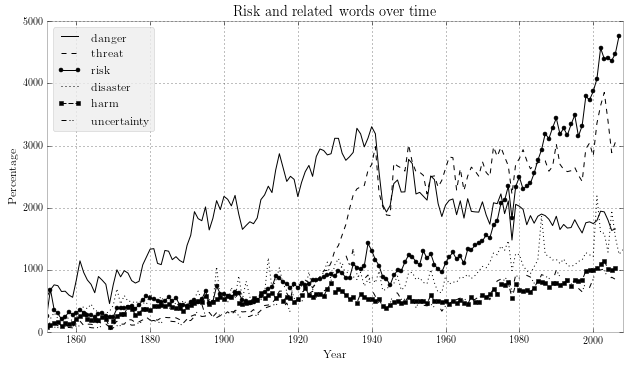

In [92]:
plotter('Risk and related words over time', second_fig, num_to_plot = 'all', 
        black_and_white = True, figsize = (10, 6), style = 'bmh', save = 'risk_related_june_final')


***Processing results***

Skipping 1 subcorpora:
    1963

***Done!***


23:48:41: images/risk_by_class_final.png created.


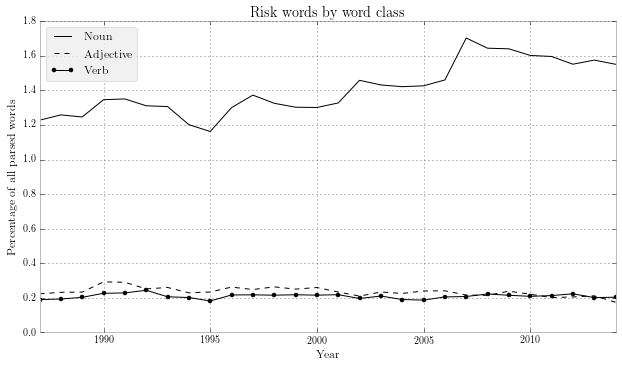

In [136]:
pos = editor(r['riskpos'].results, '%', r['allwords'].totals, skip_subcorpora = 1963)
plotter('Risk words by word class', pos.results , style = 'bmh', num_to_plot = 3,
        figsize = (10, 6), black_and_white = True, save = 'risk_by_class_final', 
        y_label = 'Percentage of all parsed words')

In [57]:
open_words = ['Noun', 'Verb', 'Adjective', 'Adverb']
maths_done = editor(r['riskpos'].results, '%', r['baseline'].results, sort_by = 'total', just_entries = open_words, skip_subcorpora = [1963])


***Processing results***

Skipping 1 subcorpora:
    1963

Keeping 4 entries:
    Noun
    Verb
    Adjective
    Adverb

***Done!***




23:25:31: images/perc_open_final.png created.


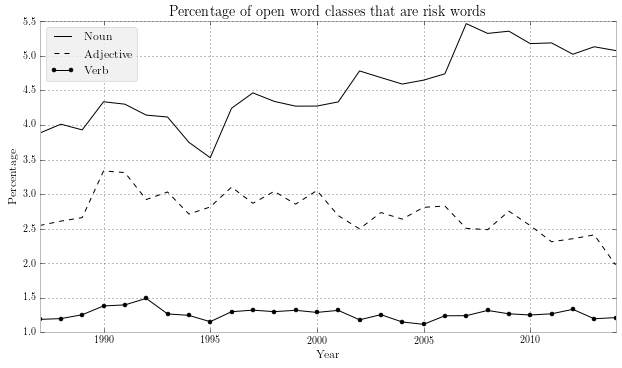


23:25:34: images/perc_open_area_final.png created.


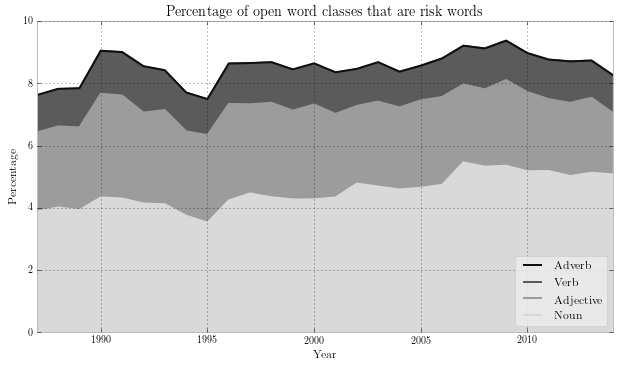

In [113]:
plotter('Percentage of open word classes that are risk words', maths_done.results, black_and_white = True,
        y_label = 'Percentage', figsize = (10, 6), style = 'bmh', num_to_plot = 3, save = 'perc_open_final')
plotter('Percentage of open word classes that are risk words', maths_done.results, 
        y_label = 'Percentage', kind = 'area', legend_pos = 'lower right',
        stacked = True, style = 'bmh', black_and_white = True, figsize = (10, 6), save = 'perc_open_area_final')


***Processing results***

***Done!***


23:02:37: images/ppm_final.png created.


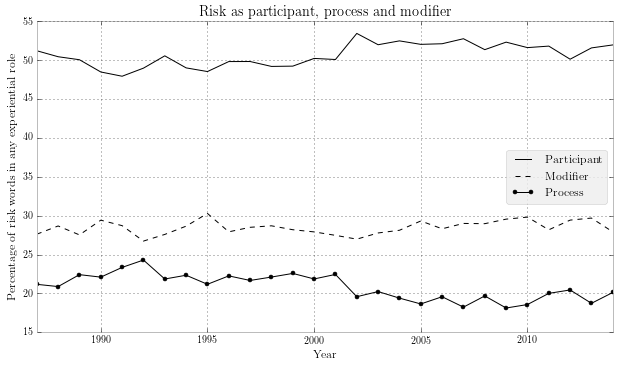

In [96]:
ppm = editor(r['risk_as_part_process_mod'].results, '%', r['risk_as_part_process_mod'].totals)
plotter('Risk as participant, process and modifier', ppm.results.drop('1963'), 
        style = 'bmh', black_and_white = True, figsize = (10, 6), save = 'ppm_final',
        y_label = 'Percentage of risk words in any experiential role')


***Processing results***

Merging 4 entries as "Process":
    dobj:take
    root:root
    dobj:pose
    dobj:run

***Done!***


***Processing results***

Merging 4060 entries as "Participant":
    nsubj:be
    dobj:reduce
    dobj:increase
    dobj:have
    dobj:carry
    dobj:face
    dobj:raise
    dobj:minimize
    dobj:assess
    dobj:create
... and 4050 more ... 

***Done!***


***Processing results***

Merging 5633 entries as "Modifier":
    pobj:at
    pobj:of
    pobj:about
    pobj:with
    pobj:to
    nn:factor
    pobj:for
    pobj:on
    pobj:in
    pobj:as
... and 5623 more ... 

***Done!***


***Processing results***

Keeping 3 entries:
    Participant
    Process
    Modifier

***Done!***


12:04:47: images/ppmfinal.png created.


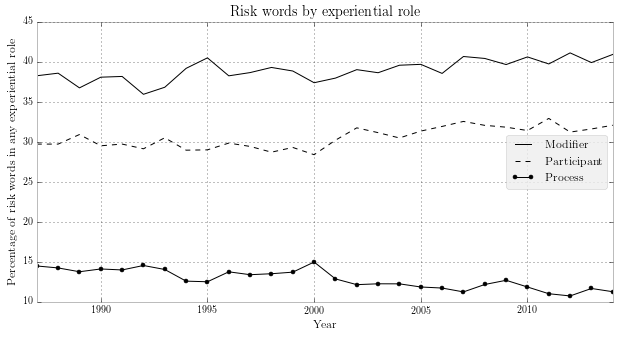

In [143]:
govs = r['all_govs']
ppm = r['risk_as_part_process_mod']
new_govs = editor(govs.results, merge_entries = r'^(root:root|dobj:(take|run|pose))$', newname = 'Process')
new_govs = editor(new_govs.results, merge_entries = r'^(dobj|nsubj|nsubjpass|csubj|acomp|iobj|csubjpass):', newname = 'Participant')
new_govs = editor(new_govs.results, merge_entries = r'^(pobj|nn|amod|rcmod|vmod|tmod|npadvmod|advmod):', newname = 'Modifier')
new_govs = editor(new_govs.results, '%', govs.totals, sort_by = 'total', just_entries = ['Participant', 'Process', 'Modifier'])
plotter('Risk words by experiential role', new_govs.results.drop('1963'), 
        style = 'bmh', figsize = (10, 6), black_and_white = True, y_label = 'Percentage of risk words in any experiential role', save = 'ppmfinal')

In [ ]:
# currently problematic
plotter('Risk as experiential subject\slash object', govs.results, style = 'bmh', 
        black_and_white = True, figsize = (10, 6))

### Adjectival modifiers of risk


***Processing results***

Skipping 1 subcorpora:
    1963

Keeping 4 entries:
    high
    calculated
    great
    potential

***Done!***


23:52:14: images/sel_adjs_final.png created.


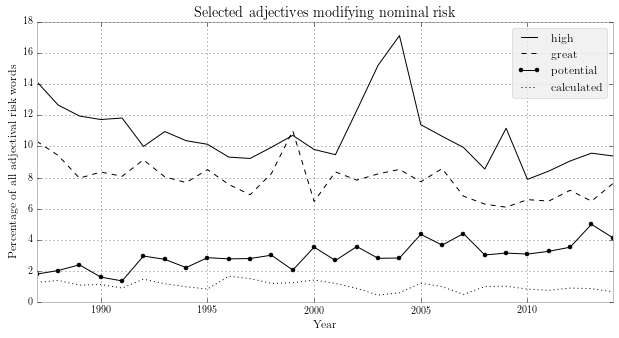

In [139]:
adjmods = editor(r['adj_modifiers'].results, '%', r['adj_modifiers'].totals, 
                 just_entries = ['high', 'calculated', 'great', 'potential'], skip_subcorpora = 1963)
plotter('Selected adjectives modifying nominal risk', adjmods.results, style = 'bmh', 
        black_and_white = True, figsize = (10, 6), save = 'sel_adjs_final', y_label = 'Percentage of all adjectival risk words')

### risk processes

In [62]:
def load_result(savename, loaddir = 'data/saved_interrogations'):
    """Reloads a save_result as namedtuple"""
    import collections
    import pickle
    import os
    import pandas
    if not savename.endswith('.p'):
        savename = savename + '.p'
    unpickled = pickle.load(open(os.path.join(loaddir, savename), 'rb'))
    
    if type(unpickled) == pandas.core.frame.DataFrame or type(unpickled) == pandas.core.series.Series:
        output = unpickled
    elif len(unpickled) == 4:
        outputnames = collections.namedtuple('interrogation', ['query', 'results', 'totals', 'table'])
        output = outputnames(unpickled[0], unpickled[1], unpickled[2], unpickled[3])        
    elif len(unpickled) == 3:
        outputnames = collections.namedtuple('interrogation', ['query', 'results', 'totals'])
        output = outputnames(unpickled[0], unpickled[1], unpickled[2])
    elif len(unpickled) == 2:
        outputnames = collections.namedtuple('interrogation', ['query', 'totals'])
        output = outputnames(unpickled[0], unpickled[1])
    return output

processes = load_result('processes')
proc_rel = editor(processes.results, '%', processes.totals, skip_subcorpora = 1963)


***Processing results***

Skipping 1 subcorpora:
    1963

***Done!***




23:26:55: images/risk_proc_final.png created.


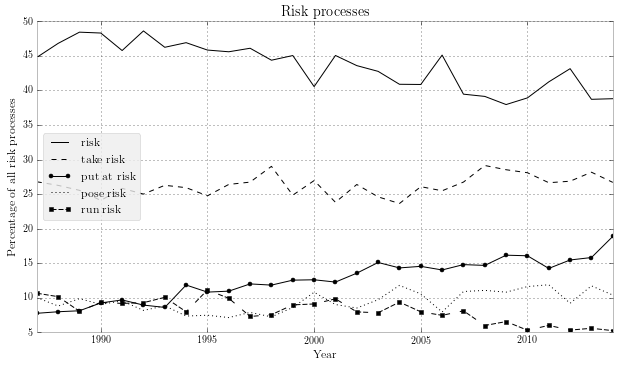

In [116]:
plotter('Risk processes', proc_rel.results, style = 'bmh', legend_pos = 'center left', save = 'risk_proc_final',
        black_and_white=True, figsize = (10, 6), y_label = 'Percentage of all risk processes')


***Processing results***

Skipping 1 subcorpora:
    1963

***Done!***


23:26:45: images/mod_types_final.png created.


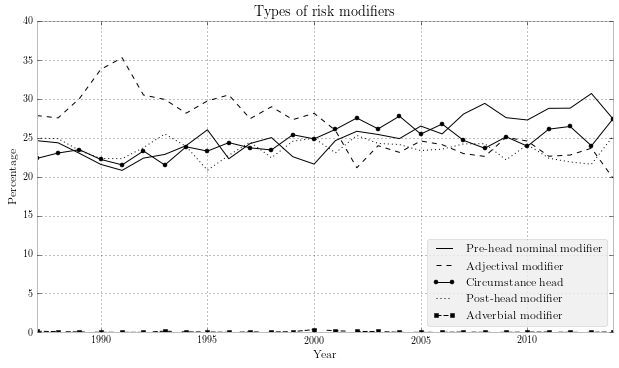

In [115]:
modifiers = r['modifiers']
mods = editor(modifiers.results, '%', modifiers.totals, skip_subcorpora = [1963])
plotter('Types of risk modifiers', mods.results, style = 'bmh', black_and_white = True, 
        figsize = (10, 6), legend_pos = 'lower right', save = 'mod_types_final')

In [65]:
subj_of_risk_process = r['subj_of_risk_process']
noun_lemmata = r['noun_lemmata']

In [83]:
rskrs = editor(subj_of_risk_process.results, '%', subj_of_risk_process.totals, 
               just_totals = True, skip_subcorpora = 1963, sort_by = 'total')


***Processing results***

Skipping 1 subcorpora:
    1963

***Done!***




23:27:23: images/riskers_total_final.png created.


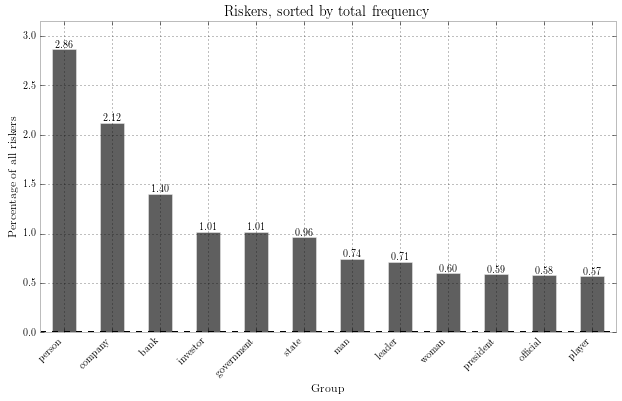

In [117]:
plotter('Riskers, sorted by total frequency', rskrs.results, kind = 'bar', black_and_white = True, style = 'bmh', figsize = (10, 6),
       num_to_plot = 12, y_label = 'Percentage of all riskers', show_totals = 'plot', save = 'riskers_total_final')


***Processing results***

Skipping 1 subcorpora:
    1963

Keeping 9 entries:
    politician
    candidate
    governor
    lawmaker
    person
    man
    woman
    child
    baby

Threshold: 19


***Done!***


23:27:37: images/rel_risker_final.png created.


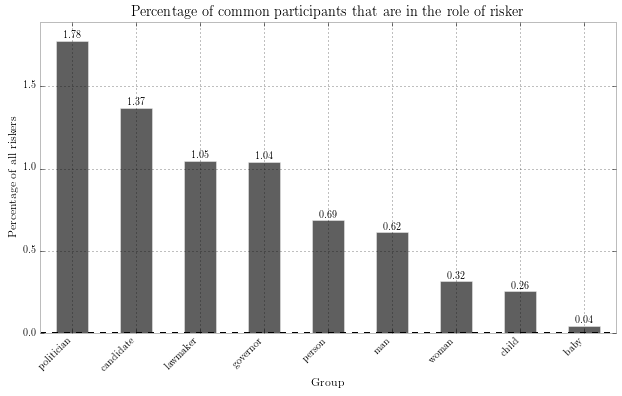

In [118]:
entities = ['politician', 'candidate', 'governor', 'lawmaker', 'person', 'man', 'woman', 'child', 'baby']
spec_riskers = editor(subj_of_risk_process.results, '%', noun_lemmata.results, 
                      just_entries = entities, skip_subcorpora = 1963, just_totals = True, sort_by = 'total')
plotter('Percentage of common participants that are in the role of risker', spec_riskers.results, 
        kind = 'bar', black_and_white = True, style = 'bmh', figsize = (10, 6), save = 'rel_risker_final',
       num_to_plot = 12, y_label = 'Percentage of all riskers', show_totals = 'plot')

In [86]:
propernouns = r['propernouns']

In [87]:
terms = ['vioxx', 'merck', 'aids', 'clinton', 'obama', 'europe', 'bush']
sel_nnp = editor(propernouns.results, just_entries = terms, skip_subcorpora = 1963, sort_by = 'total')


***Processing results***

Skipping 1 subcorpora:
    1963

Keeping 7 entries:
    vioxx
    merck
    aids
    clinton
    obama
    europe
    bush

***Done!***




23:39:21: images/propernoun_final.png created.


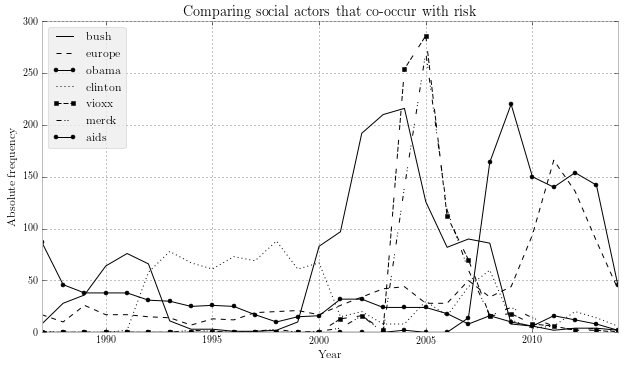

In [133]:
plotter('Comparing social actors that co-occur with risk', sel_nnp.results, legend_pos = 'upper left',
       black_and_white = True, style = 'bmh', figsize = (10, 6), save = 'propernoun_final')

In [72]:
propernouns.results.aids

1963     0
1987    87
1988    46
...
2012    12
2013     8
2014     2
Name: aids, Length: 29, dtype: int64

In [73]:
risk_of = r['risk_of']


***Processing results***

Skipping 1 subcorpora:
    1963

***Done!***


23:28:10: images/riskof_final.png created.


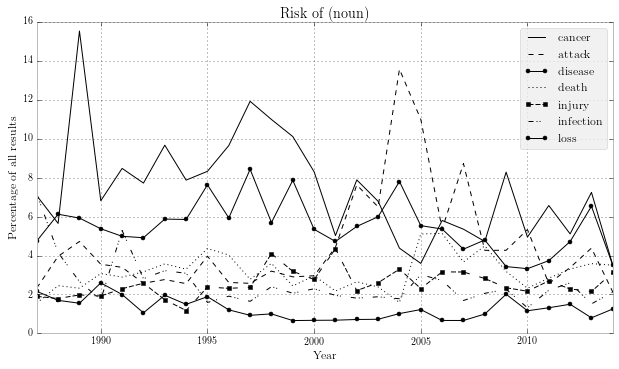

In [120]:
rel_riskof = editor(risk_of.results, '%', risk_of.totals, skip_subcorpora = 1963)
plotter('Risk of (noun)', rel_riskof.results, style = 'bmh', figsize = (10, 6), 
        black_and_white = True, y_label = 'Percentage of all results', save = 'riskof_final')

In [75]:
social_act = r['health-social-actors-w-risk-in-sent']

In [76]:
social_act.query

{'datatype': dtype('int64'),
 'dep_type': 'basic-dependencies',
 'dictionary': 'bnc.p',
 'function': 'interrogator',
 'function_filter': False,
 'lemmatag': False,
 'lemmatise': True,
 'option': 'words',
 'path': 'data/nyt/topics/health',
 'phrases': True,
 'plaintext': False,
 'query': 'NP <# (/NN.?/ !< /(?i).?\\brisk.?\\b/) >> (ROOT << /(?i).?\\brisk.?\\b/)',
 'quicksave': 'health-social-actors-w-risk-in-sent.p',
 'spelling': False,
 'table_size': 50,
 'time_ended': '2015-06=13 23:25:29',
 'time_started': '2015-06-13 23:22:05',
 'titlefilter': True,
 'translated_option': 't'}


***Processing results***

Keeping 6 entries:
    man
    woman
    person
    child
    consumer
    baby

***Done!***


23:28:49: images/everyday_health_final.png created.


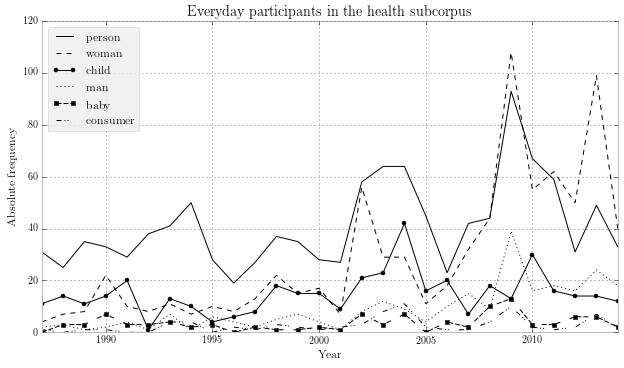

In [121]:
everyday = editor(social_act.results, just_entries = ['man', 'woman', 'person', 'child', 'consumer', 'baby'])
plotter('Everyday participants in the health subcorpus', everyday.results, 
        style = 'bmh', black_and_white=True, figsize = (10, 6), save = 'everyday_health_final')

In [78]:
inst = ['insurer', 'hospital', 'commercial insurer', 'business', 'insurance company', 
        'health maintenance organization', 'blue cross', 'disease control', 'employer']
institutional = editor(social_act.results, '%', social_act.totals, just_entries = inst)


***Processing results***

Keeping 9 entries:
    insurer
    hospital
    commercial insurer
    business
    insurance company
    health maintenance organization
    blue cross
    disease control
    employer

***Done!***




23:29:24: images/inst_health_final.png created.


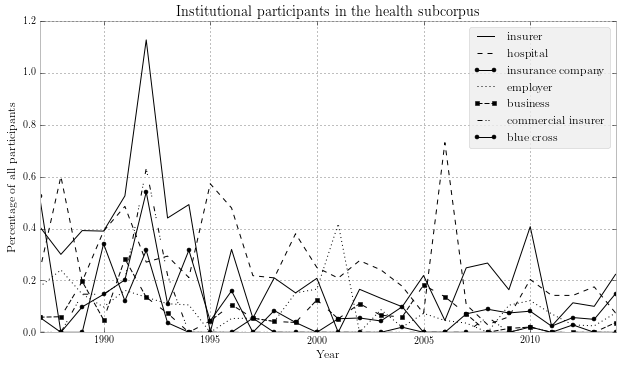

In [122]:
plotter('Institutional participants in the health subcorpus', institutional.results, figsize = (10, 6),
        y_label = 'Percentage of all participants', black_and_white = True, style = 'bmh', save = 'inst_health_final')

In [ ]:
#parts = load_result('health-part')
#peop = ['person', 'man', 'woman', 'child', 'baby', 'consumer']
#he_pa = editor(parts.results, just_entries = peop)
#plotter('Everyday participants in the health subcorpus', he_pa.results, 
    #y_label = 'Percentage of all participants',
       #figsize = (10, 6), black_and_white = True, style = 'bmh')

21:55:04: adj_modifiers.p loaded as adj_modifiers.
21:55:04: adj_riskwords.p loaded as adj_riskwords.
21:55:06: all_govs.p loaded as all_govs.
21:55:06: allwords.p loaded as allwords.
21:55:06: at_risk_things.p loaded as at_risk_things.
21:55:06: baseline.p loaded as baseline.
21:55:06: edited_adj_riskwords.p loaded as edited_adj_riskwords.
21:55:06: health-processes.p loaded as health-processes.
21:55:11: health-social-actors-w-risk-in-sent.p loaded as health-social-actors-w-risk-in-sent.
21:55:13: health_kwds.p loaded as health_kwds.
21:55:37: health_kwds_compared_to_nyt.p loaded as health_kwds_compared_to_nyt.
21:55:39: health_ngrams.p loaded as health_ngrams.
21:55:41: kwds.p loaded as kwds.
21:55:41: modals.p loaded as modals.
21:55:41: modals_lemmatised.p loaded as modals_lemmatised.
21:55:41: modifiers.p loaded as modifiers.
21:55:41: n_atrisk_n.p loaded as n_atrisk_n.
21:55:52: ngms.p loaded as ngms.
21:56:12: noun_lemmata.p loaded as noun_lemmata.
21:56:12: predicators.p loaded as predicators.
21:56:12: proc_w_risk_part.p loaded as proc_w_risk_part.
21:56:12: processes.p failed to load. Try using load_result to find out the matter.
21:56:24: propernouns.p loaded as propernouns.
21:56:24: relationals.p loaded as relationals.
21:56:24: risk_as_part_process_mod.p loaded as risk_as_part_process_mod.
21:56:24: risk_objects.p loaded as risk_objects.
21:56:24: risk_of.p loaded as risk_of.
21:56:25: risk_verbing.p loaded as risk_verbing.
21:56:25: riskpos.p loaded as riskpos.
21:56:25: riskwords.p loaded as riskwords.
21:56:26: sayers.p loaded as sayers.
21:56:26: social-actors-w-risk-in-sent.p loaded as social-actors-w-risk-in-sent.
21:56:26: subj_of_risk_process.p loaded as subj_of_risk_process.
21:56:26: terror_heart.p loaded as terror_heart.
21:56:27: uniques.p loaded as uniques.
21:56:27: x_subj_of_risk_process.p loaded as x_subj_of_risk_process.


***Processing results***

***Done!***


23:40:16: images/ngram_health_inc_final.png created.


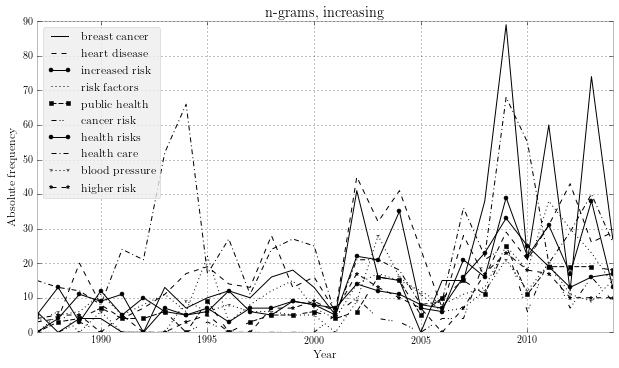

In [135]:
health_ngrams = r['health_ngrams']
inc = editor(health_ngrams.results, sort_by = 'increase')
plotter('n-grams, increasing', inc.results, num_to_plot=10, figsize = (10, 6), y_label = 'Absolute frequency',
        style = 'bmh', black_and_white = True, save = 'ngram_health_inc_final')

In [127]:
dec = editor(health_ngrams.results, sort_by = 'decrease')
quickview(dec, 20)
dec = editor(dec.results, skip_entries = [8, 9, 10])


***Processing results***

***Done!***

  0: blue cross
  1: aids virus
  2: insurance companies
  3: commercial insurers
  4: blue shield
  5: health insurance
  6: care workers
  7: managed care
  8: license makefile
  9: src stoplists
 10: dist inputdirectory
 11: insurance company
 12: york city
 13: health maintenance
 14: prenatal care
 15: insurance industry
 16: cholesterol levels
 17: small groups
 18: small businesses
 19: life insurance

***Processing results***

Skipping 3 entries:
    license makefile
    src stoplists
    dist inputdirectory

***Done!***




23:32:30: images/ngram_health_dec_final.png created.


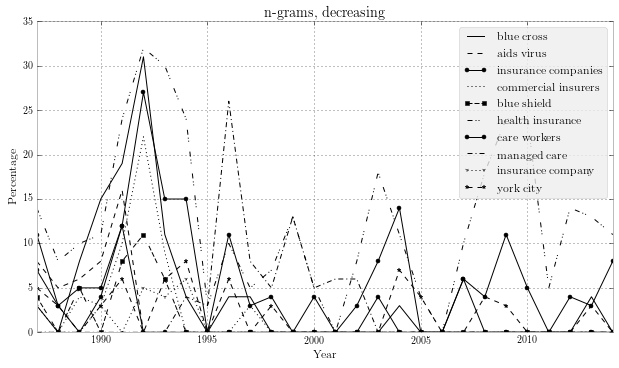

In [128]:
plotter('n-grams, decreasing', dec.results, num_to_plot=10, figsize = (10, 6),
        style = 'bmh', black_and_white = True, legend_pos = 'upper right', save = 'ngram_health_dec_final')

In [25]:
inc_part = editor(social_act.results, '%', social_act.totals, sort_by = 'increase')


***Processing results***

***Done!***




23:33:13: images/part_health_inc_final.png created.


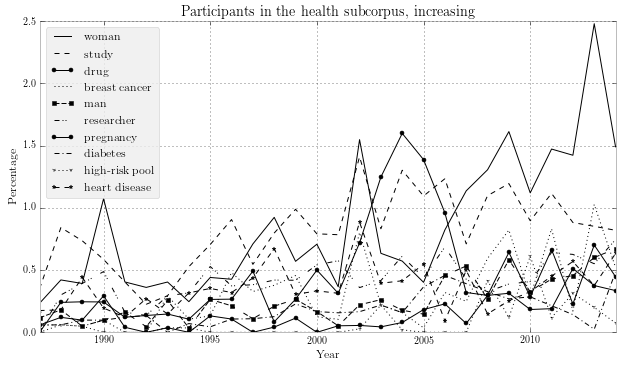

In [129]:
plotter('Participants in the health subcorpus, increasing', inc_part.results, num_to_plot=10, figsize = (10, 6),
        style = 'bmh', black_and_white = True, save = 'part_health_inc_final')

In [31]:
cats = [('Infectious disease', ['aids', 'aid', 'aids virus', 'aids patient', 'transmission', 'flu', 'influenza']),
('Life world', ['person', 'man', 'woman', 'child', 'baby', 'consumer']),
('Intitutions', ['empire', 'hospital', 'commercial', 'business', 'insurance company', 'HMO/health maintenance organisation', 'blue cross', 'disease control', 'employer', 'insurer', 'health insurance association', 'insurance industry', 'office']),
('Non-infectious disease', ['breast cancer', 'cancer', 'heart disease', 'diabetes', 'heart attack', 'prostate cancer', 'stroke', 'ovarian cancer', 'obesity']),
('Science and research',  ['study', 'researcher', 'finding', 'new study', 'author', 'university', 'expert'])]

In [35]:
themes = r['health-social-actors-w-risk-in-sent']
themes_all = r['health-social-actors-w-risk-in-sent']
for name, cat in cats:
    themes = editor(themes.results, merge_entries = cat, newname = name)
themes = editor(themes.results, '%', themes_all.totals, just_entries = [n for n, t in cats], sort_by = 'total')


***Processing results***

Merging 6 entries as "Infectious disease":
    aid
    aids virus
    aids patient
    transmission
    flu
    influenza

***Done!***


***Processing results***

Merging 6 entries as "Life world":
    person
    man
    woman
    child
    baby
    consumer

***Done!***


***Processing results***

Merging 12 entries as "Intitutions":
    empire
    hospital
    commercial
    business
    insurance company
    blue cross
    disease control
    employer
    insurer
    health insurance association
... and 2 more ... 

***Done!***


***Processing results***

Merging 9 entries as "Non-infectious disease":
    breast cancer
    cancer
    heart disease
    diabetes
    heart attack
    prostate cancer
    stroke
    ovarian cancer
    obesity

***Done!***


***Processing results***

Merging 7 entries as "Science and research":
    study
    researcher
    finding
    new study
    author
    university
    expert

***Done!***


***Processing results***

Keeping


23:33:31: images/themes_final.png created.


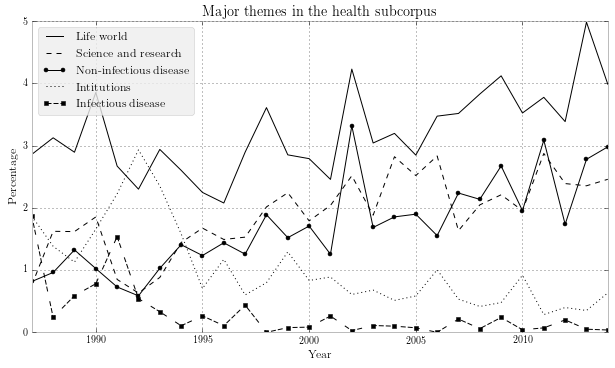

In [130]:
plotter('Major themes in the health subcorpus', themes.results, 
        num_to_plot=10, figsize = (10, 6),
        style = 'bmh', black_and_white = True, save = 'themes_final')